# Module 3 Section 2 Lab 2 - Data Visualization with Seaborn

# Introduction

- Seaborn adalah pustaka visualisasi data Python berdasarkan matplotlib.
- Ini menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik dan informatif. Ini memberikan pilihan untuk gaya plot dan default warna, mendefinisikan fungsi tingkat tinggi sederhana untuk jenis plot statistik umum, dan terintegrasi dengan fungsionalitas yang disediakan oleh Pandas DataFrames.
- Ide utama Seaborn adalah ia menyediakan perintah tingkat tinggi untuk membuat berbagai jenis plot yang berguna untuk eksplorasi data, dan bahkan beberapa penyesuaian model statistik.

# Agenda

1. Creating basic plots
    - Line Chart
    - Bar Chart
    - Histogram
    - Box plot
    - Violin plot
    - Scatter plot
    - Hue semantic
    - Bubble plot
    - Pie Chart
2. Advance Categorical plots in Seaborn
3. Density plots
4. Pair plots

In [1]:
# importing required libraries
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize']=(10,10)

# Load dataset

In [2]:
# read the dataset
data_BM = pd.read_csv('bigmart_data.csv')

# drop the null values
data_BM = data_BM.dropna(how="any")

# multiply Item_Visibility by 100 to increase size
data_BM["Visibility_Scaled"] = data_BM["Item_Visibility"] * 100

# view the top results
data_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility_Scaled
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.604730
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.927822
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.676007
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.000000


# 1. Basic plots

Mari kita lihat bagaimana Anda bisa membuat beberapa plot dasar di seaborn dalam satu baris yang membutuhkan banyak baris di matplotlib.

## Line Chart
 
* Dengan data, kita mungkin ingin memahami perubahan dalam satu variabel sebagai fungsi waktu, atau variabel kontinu yang serupa.
* Di seaborn, ini dapat dilakukan dengan fungsi **lineplot()**, baik secara langsung atau dengan **relplot()** dengan **kind="line"**

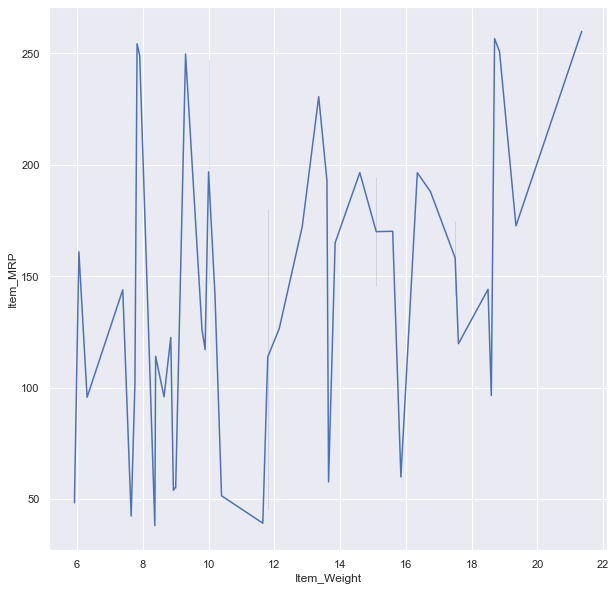

In [3]:
# line plot using relplot
sns.lineplot(x="Item_Weight", y="Item_MRP",data=data_BM[:50]);

## Bar Chart

- Di seaborn, kita dapat membuat diagram batang hanya dengan menggunakan fungsi **barplot**.
- Perhatikan bahwa untuk mencapai hal yang sama di matplotlib, kita harus menulis kode tambahan hanya untuk mengelompokkan kategori data.
- Dan kemudian kami harus menulis lebih banyak kode untuk memastikan bahwa plotnya benar. 

<AxesSubplot:xlabel='Item_Type', ylabel='Item_MRP'>

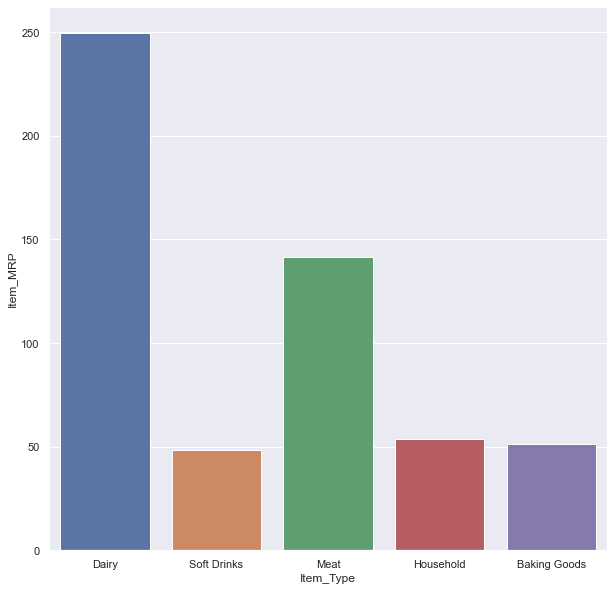

In [4]:
sns.barplot(x="Item_Type", y="Item_MRP", data=data_BM[:5])

## Histogram

- Kita dapat membuat histogram di seaborn hanya dengan menggunakan **distplot()**. Ada beberapa opsi yang dapat kita gunakan yang akan kita lihat lebih lanjut di notebook.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

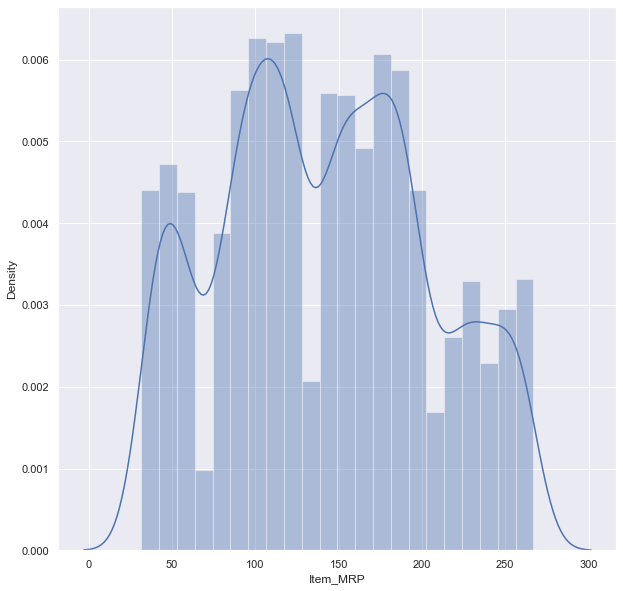

In [5]:
sns.distplot(data_BM['Item_MRP'])

## Box plots

- Kita dapat menggunakan **boxplot()** untuk membuat boxplot di seaborn.
- Mari kita coba untuk memvisualisasikan distribusi Item_Outlet_Sales item.

<AxesSubplot:xlabel='Item_Outlet_Sales'>

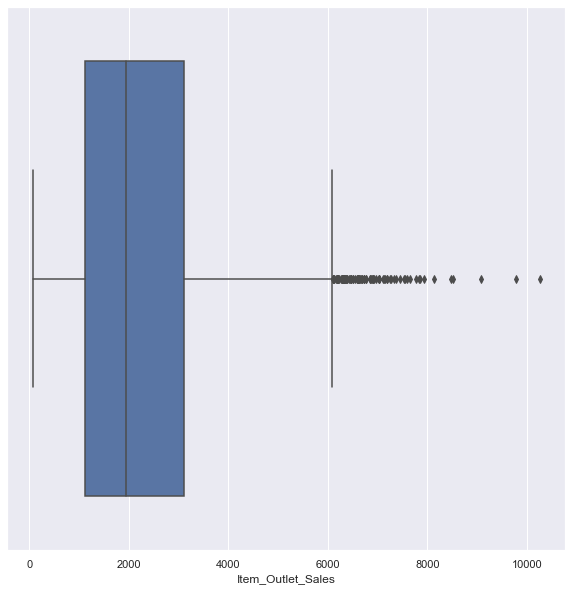

In [6]:
sns.boxplot(data_BM['Item_Outlet_Sales'], orient='vertical')

## Violin plot


- Violin plot memainkan peran yang sama dengan box plot.
- Ini menunjukkan distribusi data kuantitatif di beberapa tingkat dari satu (atau lebih) variabel kategori sehingga distribusi tersebut dapat dibandingkan.
- Tidak seperti box plot, di mana semua komponen plot sesuai dengan titik data aktual, violin plot menampilkan estimasi kepadatan kernel dari distribusi yang mendasarinya.
- Kita dapat membuat violing plot menggunakan **violinplot()** di seaborn.

<AxesSubplot:xlabel='Item_Outlet_Sales'>

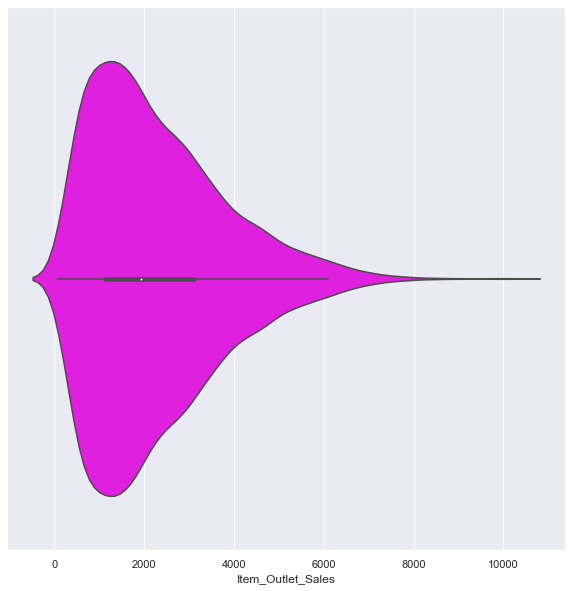

In [7]:
sns.violinplot(data_BM['Item_Outlet_Sales'], orient='vertical', color='magenta')

## Scatter plot

* Ini menggambarkan distribusi dua variabel menggunakan titik, di mana setiap titik mewakili value dalam kumpulan data.
* Penggambaran ini memungkinkan  untuk menyimpulkan sejumlah besar informasi tentang apakah ada hubungan yang berarti di antara mereka.
- Kita dapat menggunakan **relplot()** dengan opsi `kind=scatter` untuk memplot scatter plot di seaborn.

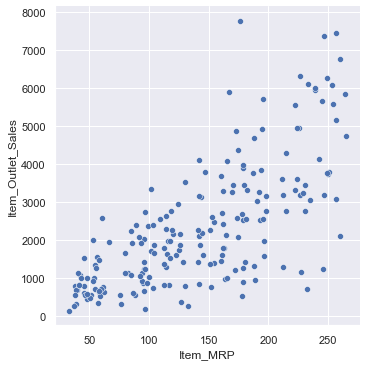

In [8]:
# scatter plot
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=data_BM[:200], kind="scatter");

## Hue semantic

- Kita juga dapat menambahkan dimensi lain ke plot dengan mewarnai titik. Di seaborn, ini disebut menggunakan "hue semantic".

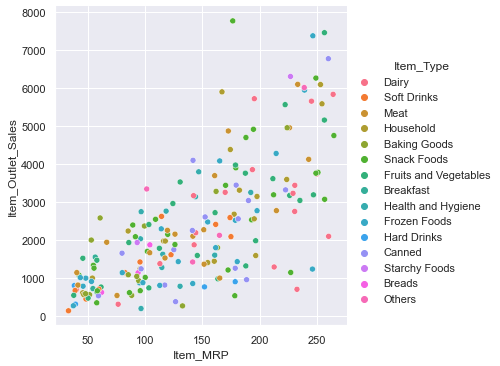

In [9]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Item_Type",data=data_BM[:200]);

- Ingat **line chart** yang kita buat sebelumnya? Saat kita menggunakan semantik **hue**, kita dapat membuat plot garis yang lebih kompleks di seaborn.
- Dalam contoh berikut, **line chart yang berbeda untuk berbagai kategori Outlet_Size** dibuat.

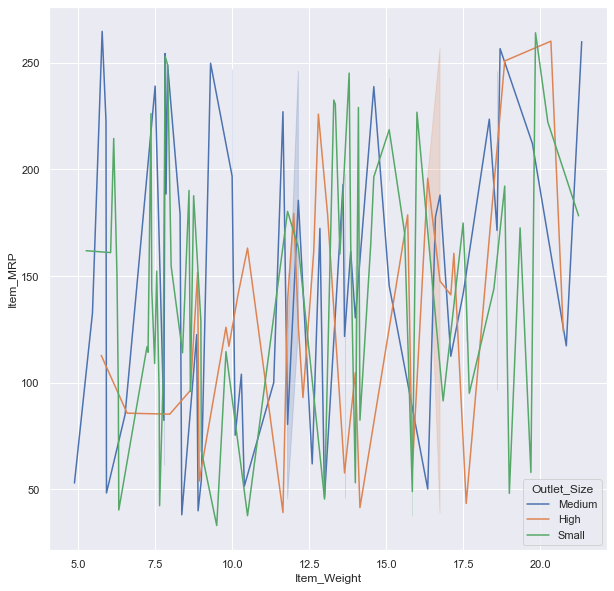

In [10]:
# different line plots for different categories of the Outlet_Size
sns.lineplot(x="Item_Weight", y="Item_MRP",hue='Outlet_Size',data=data_BM[:150]);

## Bubble plot

- Kita dapat menggunakan  **hue** untuk mewarnai gelembung berdasarkan Item_Visibility-nya dan pada saat yang sama menggunakannya sebagai ukuran masing-masing gelembung.

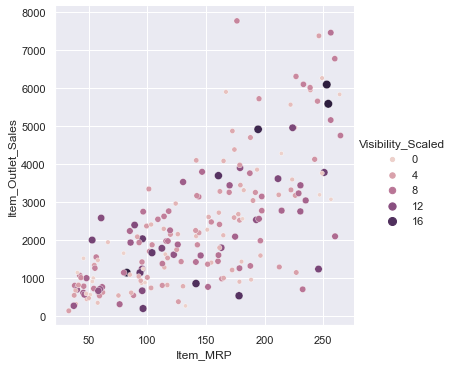

In [11]:
# bubble plot
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=data_BM[:200], kind="scatter", size="Visibility_Scaled", hue="Visibility_Scaled");

## Category wise sub plot

- Kita juga dapat membuat **plot berdasarkan kategori** di seaborn.
- Kita telah membuat scatter plot untuk setiap Outlet_Size

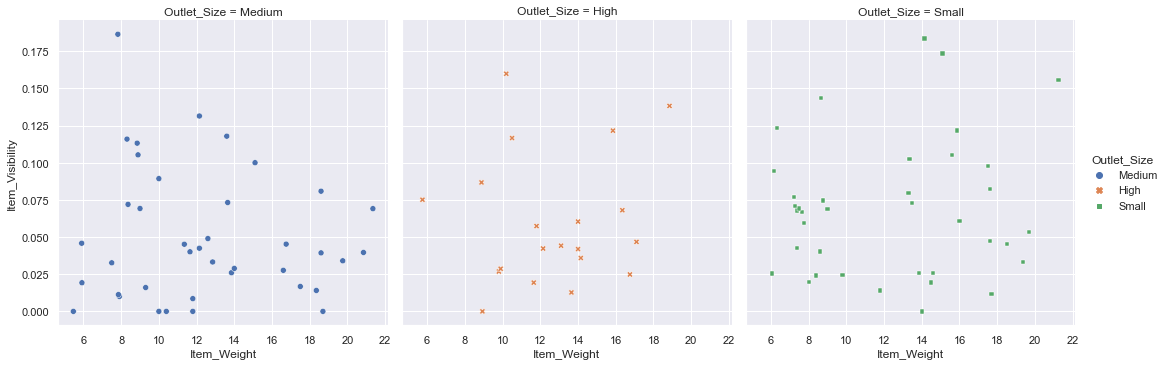

In [12]:
# subplots for each of the category of Outlet_Size
sns.relplot(x="Item_Weight", y="Item_Visibility",hue='Outlet_Size',style='Outlet_Size',col='Outlet_Size',data=data_BM[:100]);

# 2. Advance categorical plots in seaborn

Untuk variabel kategori kita memiliki tiga jeni yang berbeda di seaborn.

* **Categorical scatterplots:**

 * stripplot() (with kind="strip"; the default)
 * swarmplot() (with kind="swarm")

* **Categorical distribution plots:**

 * boxplot() (with kind="box")
 * violinplot() (with kind="violin")
 * boxenplot() (with kind="boxen")

* **Categorical estimate plots:**

 * pointplot() (with kind="point")
 * barplot() (with kind="bar")

**The default representation of the data in catplot() uses a scatterplot.**

# a. Categorical scatterplots

## Strip plot
- Menggambar scatterplot di mana satu variabel bersifat kategoris.
- Kita dapat membuatnya dengan meneruskan **kind=strip** di `catplot()`.

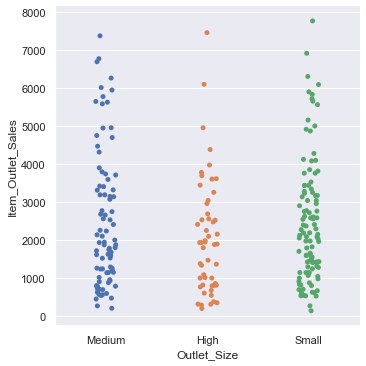

In [14]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='strip',data=data_BM[:250]);

## Swarm plot

- Fungsi ini mirip dengan `stripplot()`, tetapi titik-titiknya disesuaikan (hanya di sepanjang sumbu kategorikal) sehingga tidak tumpang tindih
- Kita dapat membuat ini dengan meneruskan **kind=swarm** di `catplot()`.

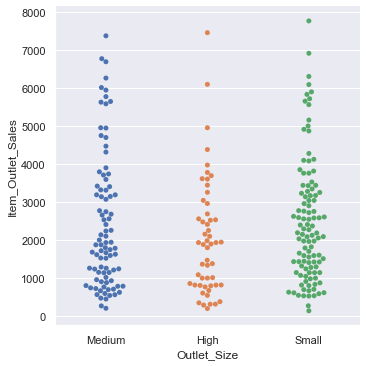

In [15]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='swarm',data=data_BM[:250]);

# b. Categorical distribution plots

## Box Plots
 
* Box plot menunjukkan tiga nilai kuartil dari distribusi bersama dengan nilai-nilai ekstrim.
* The “whiskers” meluas ke titik-titik yang terletak dalam 1,5 IQR dari kuartil bawah dan atas, dan kemudian pengamatan yang berada di luar kisaran ini ditampilkan secara independen.
* Ini berarti bahwa setiap nilai dalam boxplot sesuai dengan pengamatan sebenarnya dalam data.

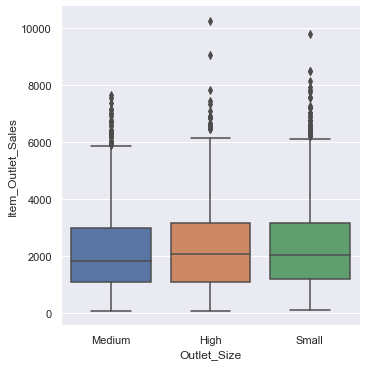

In [16]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="box",data=data_BM);

## Violin Plots

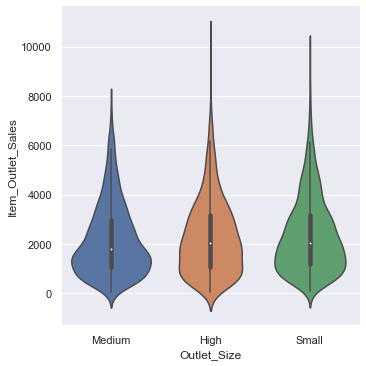

In [17]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="violin",data=data_BM);

## Boxen plots

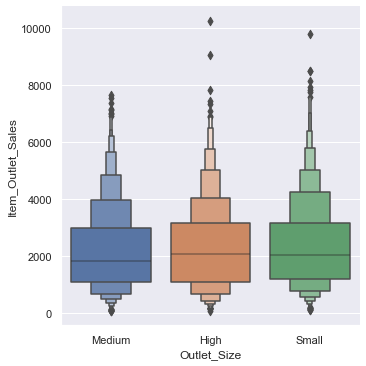

In [18]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="boxen",data=data_BM);

## Point plot

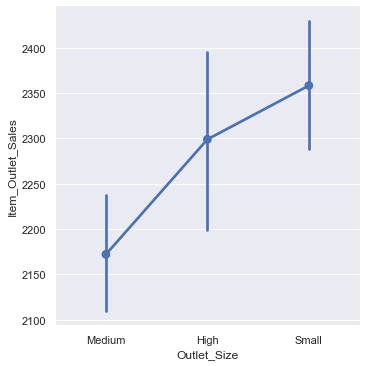

In [19]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="point",data=data_BM);


## Bar plots

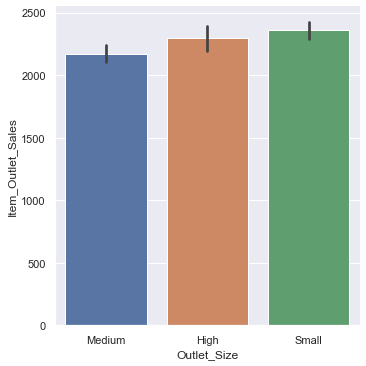

In [20]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales",kind="bar",data=data_BM);

# 3. Density Plots

***Daripada histogram, kita bisa mendapatkan estimasi distribusi yang lancar menggunakan estimasi kepadatan kernel, yang dilakukan Seaborn dengan sns.kdeplot:***

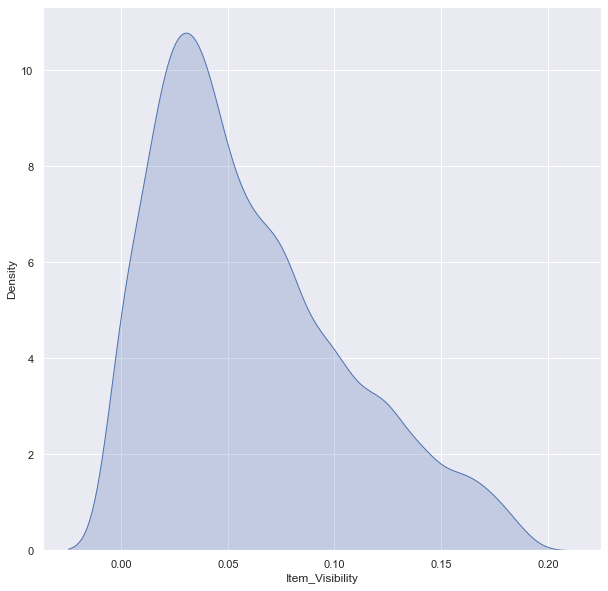

In [21]:
# distribution of Item Visibility
plt.figure(figsize=(10,10))
sns.kdeplot(data_BM['Item_Visibility'], shade=True);

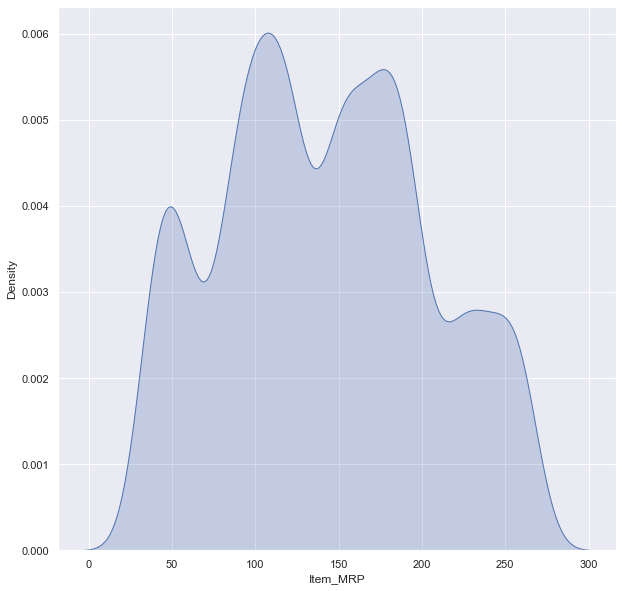

In [22]:
# distribution of Item MRP
plt.figure(figsize=(10,10))
sns.kdeplot(data_BM['Item_MRP'], shade=True);

## Histogram and Density Plot

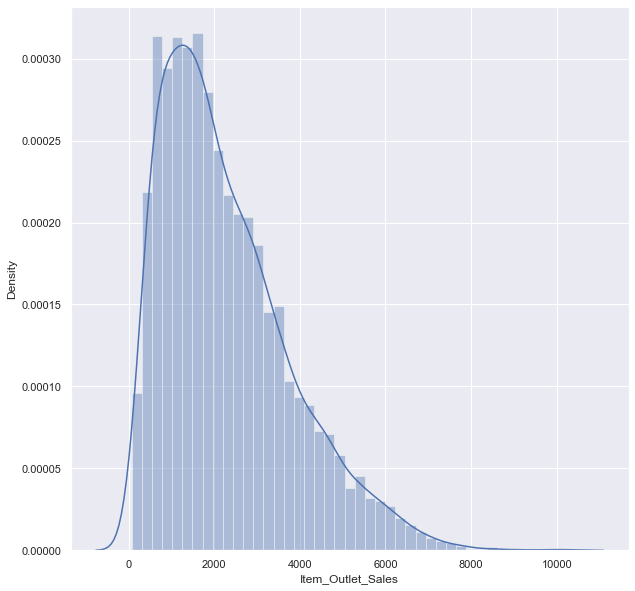

In [23]:
plt.figure(figsize=(10,10))
sns.distplot(data_BM['Item_Outlet_Sales']);

# 4. Pair plots

* Saat kita menggeneralisasi plot gabungan ke kumpulan data dengan dimensi yang lebih besar, kita akan mendapatkan plot pasangan. Ini sangat berguna untuk menjelajahi korelasi antara data multidimensi, ketika Anda ingin memplot semua pasangan nilai satu sama lain.
* Kita akan mendemonstrasikan ini dengan kumpulan data Iris yang terkenal, yang mencantumkan pengukuran kelopak dan sepal dari tiga spesies iris

In [24]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


***Visualizing the multidimensional relationships among the samples is as easy as calling sns.pairplot:***

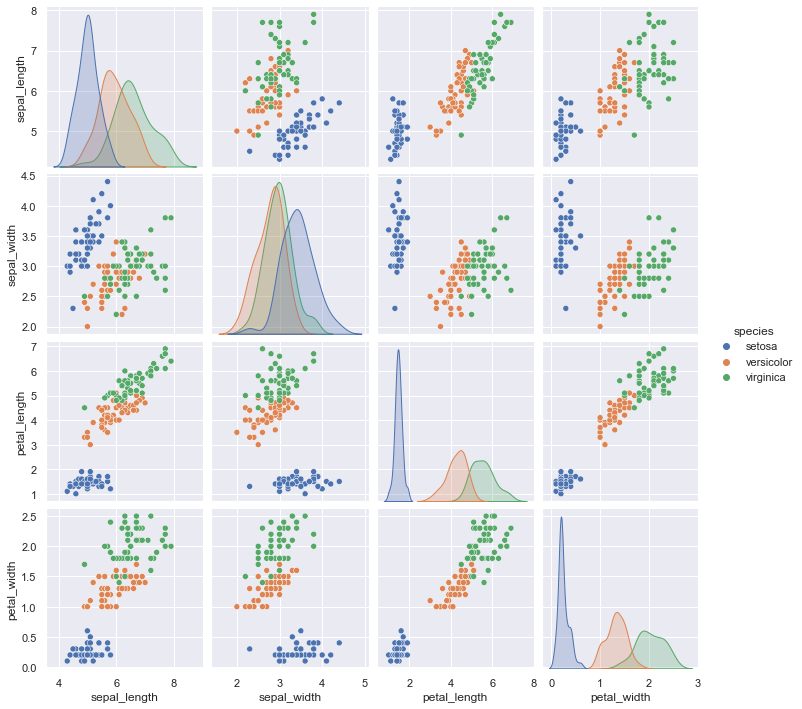

In [25]:
sns.pairplot(iris, hue='species', height=2.5);